# MNIST - regression

Use SGDClassifier and LogisiticRegression from scikit-learn to build classifiers for the MNIST dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(60000, 784) (10000, 784) (60000,) (10000,)


In [5]:
sgd_class = SGDClassifier(loss="log_loss", random_state=0)
sgd_class.fit(x_train, y_train)
y_pred = sgd_class.predict(x_test)
print("SGD Classifier accuracy:", accuracy_score(y_test, y_pred))

SGD Classifier accuracy: 0.8671


Number of missclassified samples: 1329


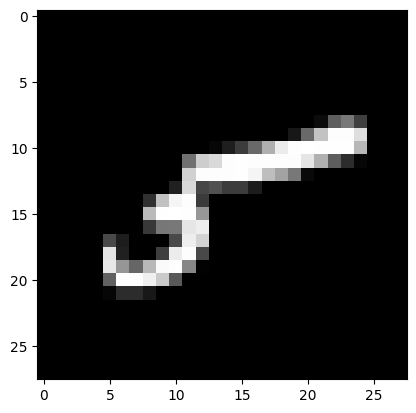

In [15]:
missclassified = x_test[y_test != y_pred]
print("Number of missclassified samples:", missclassified.shape[0])
plt.imshow(missclassified.iloc[5].values.reshape(28, 28), cmap='gray')
plt.show()

In [16]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_log))

/home/alex/projects/alex/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alex/projects/alex/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9127


Number of missclassified samples (Logistic Regression): 873


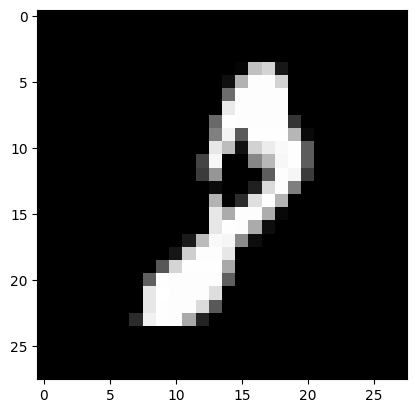

In [17]:
missclassified_log_reg = x_test[y_test != y_pred_log]
print("Number of missclassified samples (Logistic Regression):", missclassified_log_reg.shape[0])
plt.imshow(missclassified_log_reg.iloc[5].values.reshape(28, 28), cmap='gray')
plt.show()